In [1]:
from tqdm import tqdm

from torchvision.datasets import MNIST
from torchvision import transforms
import torch
from torch import nn
from torch import optim

import matplotlib.pyplot as plt

from wgan import Critic, Generator

In [2]:
# device = 'cuda'
device = 'cpu'

In [3]:
batch_size = 64
LATENT_DIM = 64
HID_DIM = 64
LR = 2e-4
CRITIC_STEPS = 2
GRAD_WEIGHT = 10

In [ ]:
train = MNIST('./', download=True,  train=True, transform=transforms.ToTensor())
test = MNIST('./', download=True,  train=False, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.1MB/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 484kB/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.85MB/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.74MB/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [4]:
# Normalize the weights of generator and critic
def weights_init(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.ConvTranspose2d):
        torch.nn.init.normal_(m.weight, 0.0, 0.02)
    if isinstance(m, nn.BatchNorm2d):
        torch.nn.init.normal_(m.weight, 0.0, 0.02)
        torch.nn.init.constant_(m.bias, 0)


In [5]:
N_EPOCHS = 20

In [7]:
crit = Critic().to(device).apply(weights_init)
gen = Generator().to(device).apply(weights_init)

print(sum([p.numel() for p in crit.parameters() if p.requires_grad])), print(sum([p.numel() for p in gen.parameters() if p.requires_grad]))

268161
247617


(None, None)

  0%|          | 0/20 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:825: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at ../aten/src/ATen/cuda/CublasHandlePool.cpp:135.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


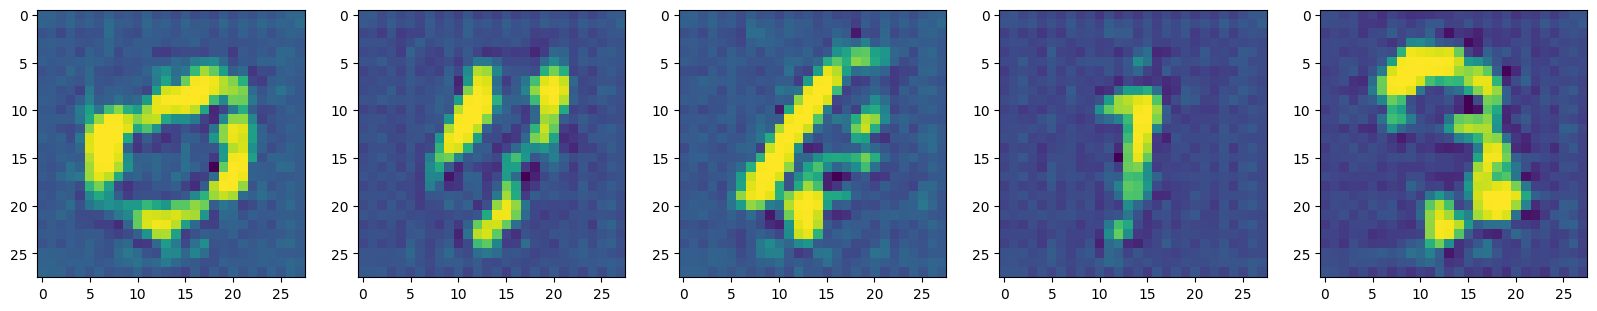

generator_loss=-0.42709314823150635,mean_critic_loss=-3.1408214569091797:   5%|▌         | 1/20 [00:39<12:35, 39.77s/it]

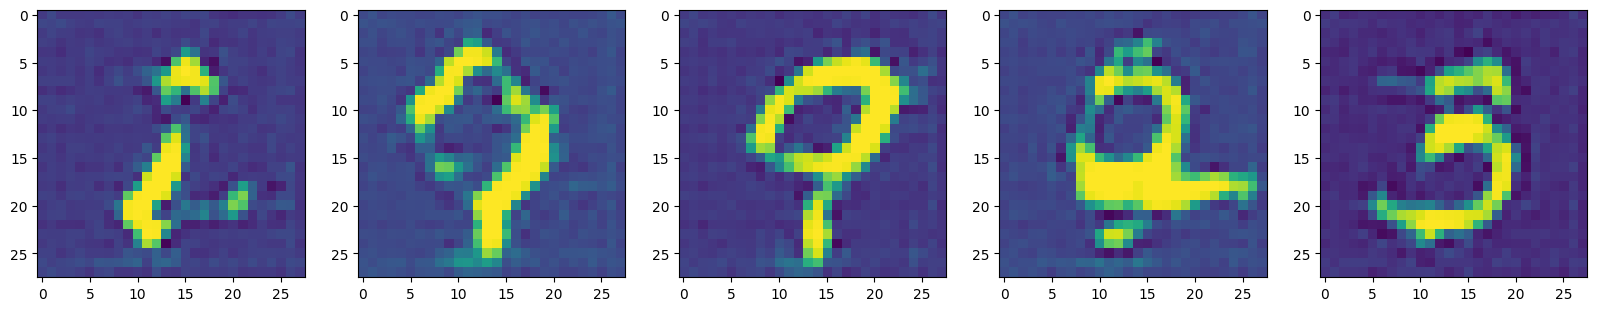

generator_loss=1.4145041704177856,mean_critic_loss=-6.389543533325195:  10%|█         | 2/20 [01:15<11:17, 37.62s/it]

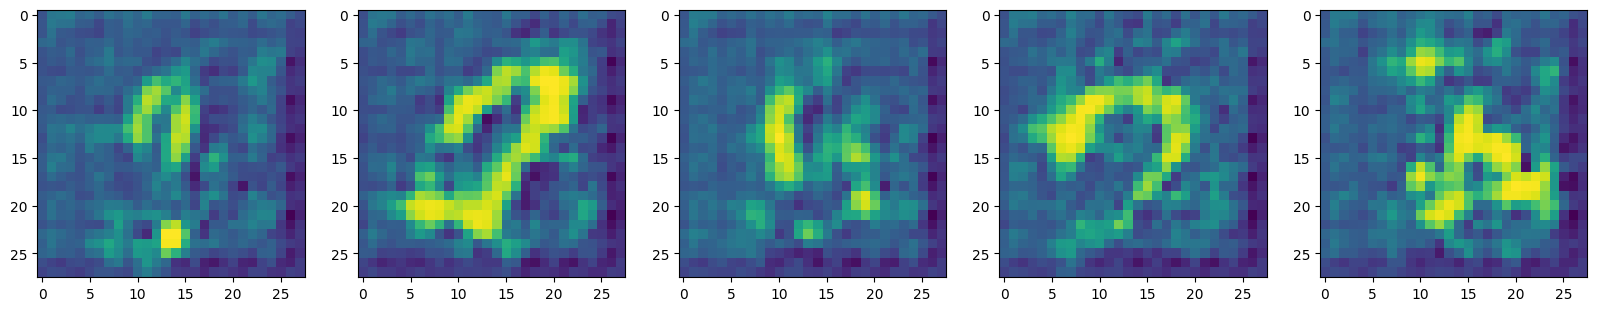

generator_loss=-4.774935245513916,mean_critic_loss=-0.1461780071258545:  15%|█▌        | 3/20 [01:52<10:29, 37.05s/it]

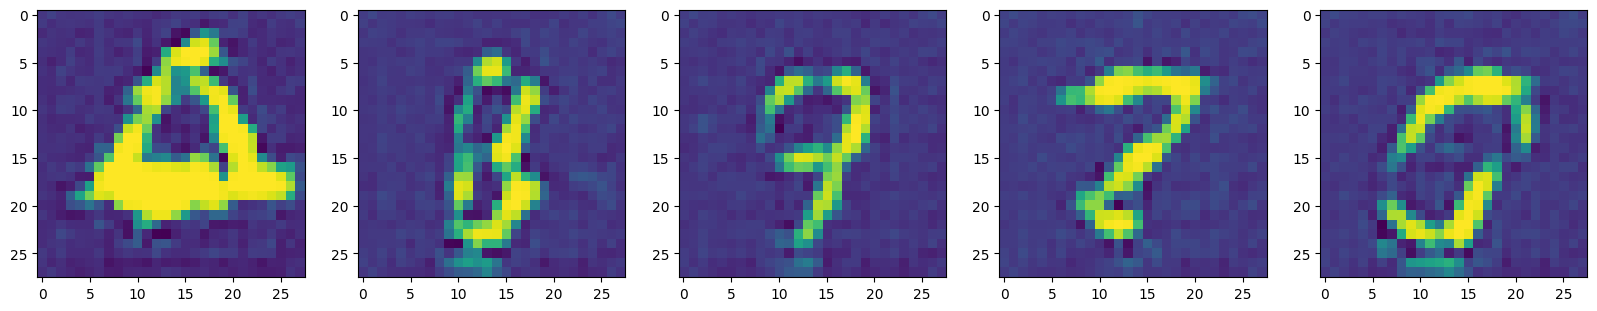

generator_loss=-0.37091585993766785,mean_critic_loss=-3.3721182346343994:  20%|██        | 4/20 [02:28<09:50, 36.88s/it]

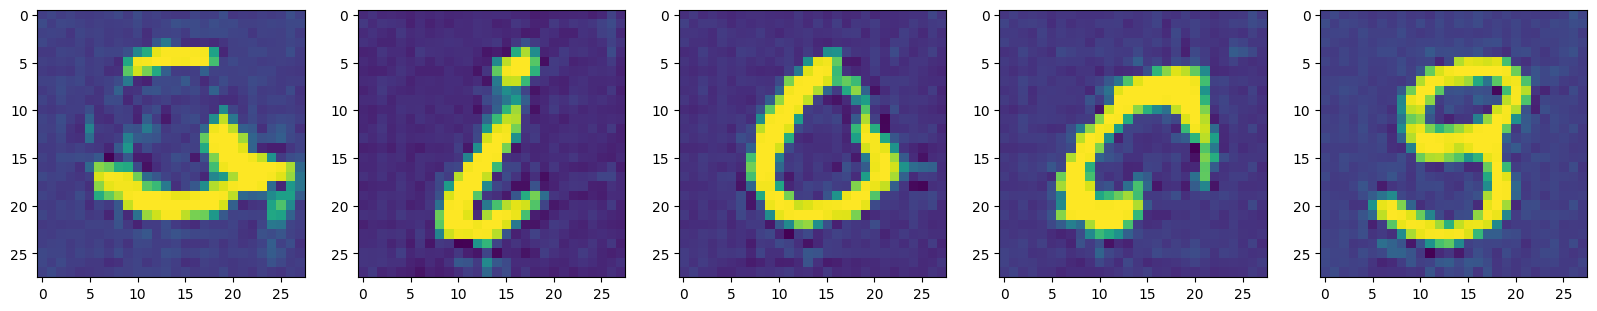

generator_loss=0.1835716962814331,mean_critic_loss=-6.934781074523926:  25%|██▌       | 5/20 [03:05<09:10, 36.71s/it]

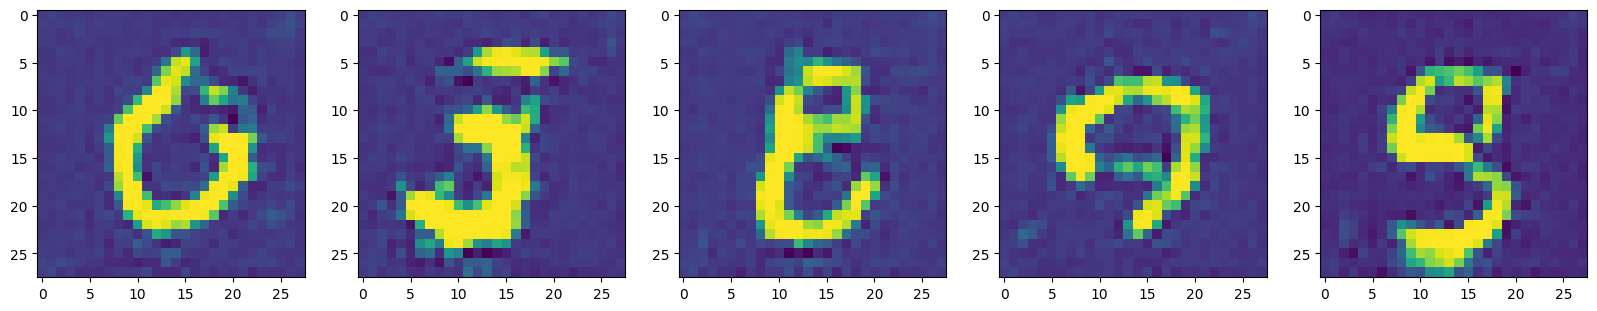

generator_loss=-4.490744590759277,mean_critic_loss=1.3503302335739136:  30%|███       | 6/20 [03:41<08:32, 36.64s/it]

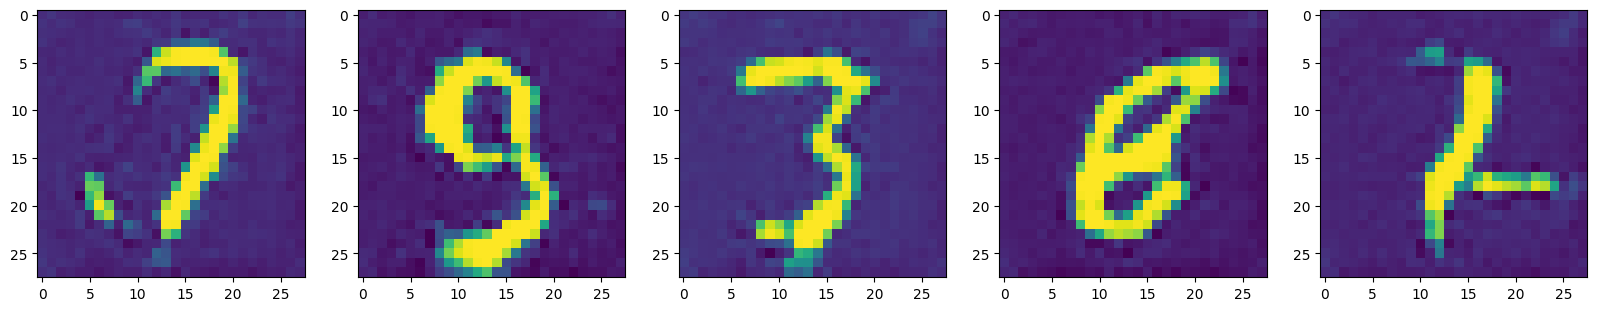

generator_loss=3.09871506690979,mean_critic_loss=-12.537649154663086:  35%|███▌      | 7/20 [04:18<07:54, 36.51s/it]

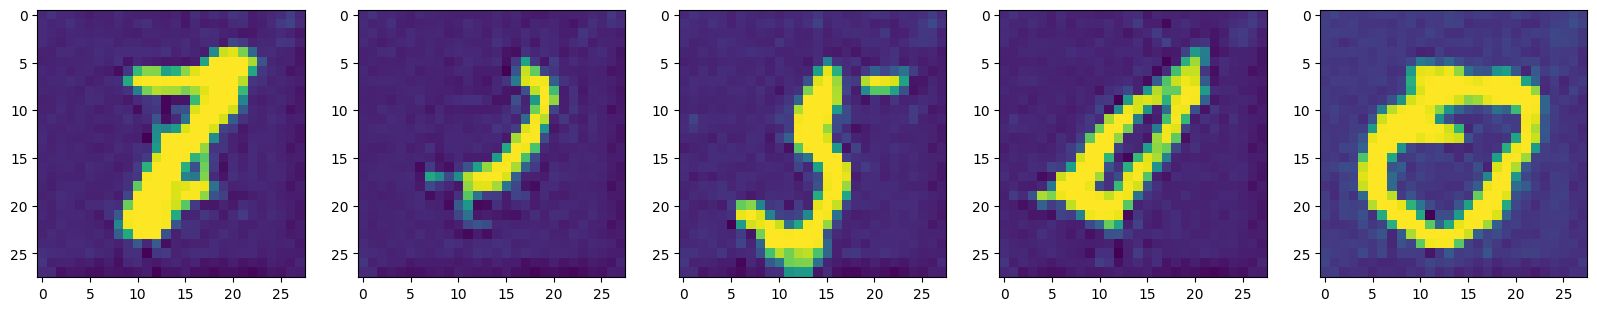

generator_loss=6.589446067810059,mean_critic_loss=-22.66985321044922:  40%|████      | 8/20 [04:54<07:17, 36.44s/it]

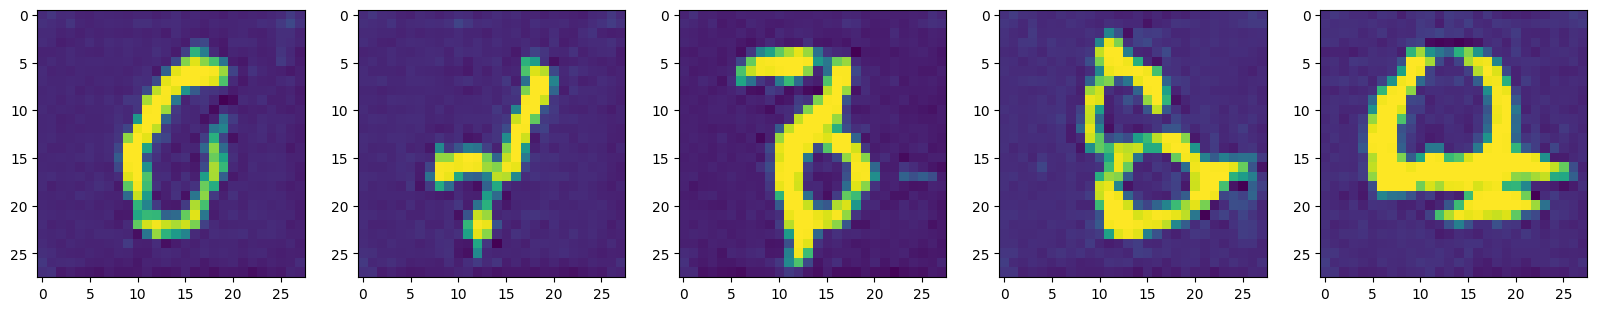

generator_loss=5.83901834487915,mean_critic_loss=-0.7245502471923828:  45%|████▌     | 9/20 [05:30<06:41, 36.46s/it]

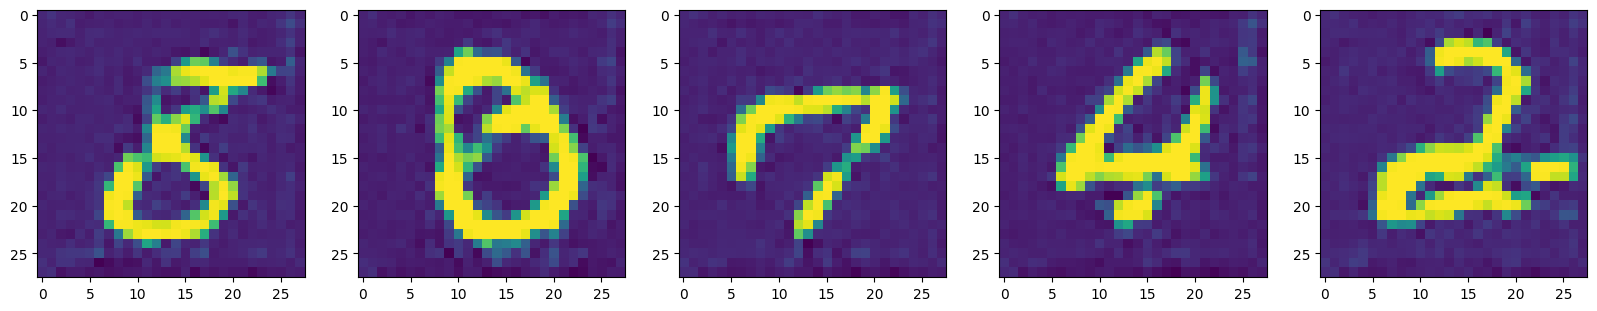

generator_loss=-2.8710451126098633,mean_critic_loss=-4.382630348205566:  50%|█████     | 10/20 [06:07<06:04, 36.44s/it]

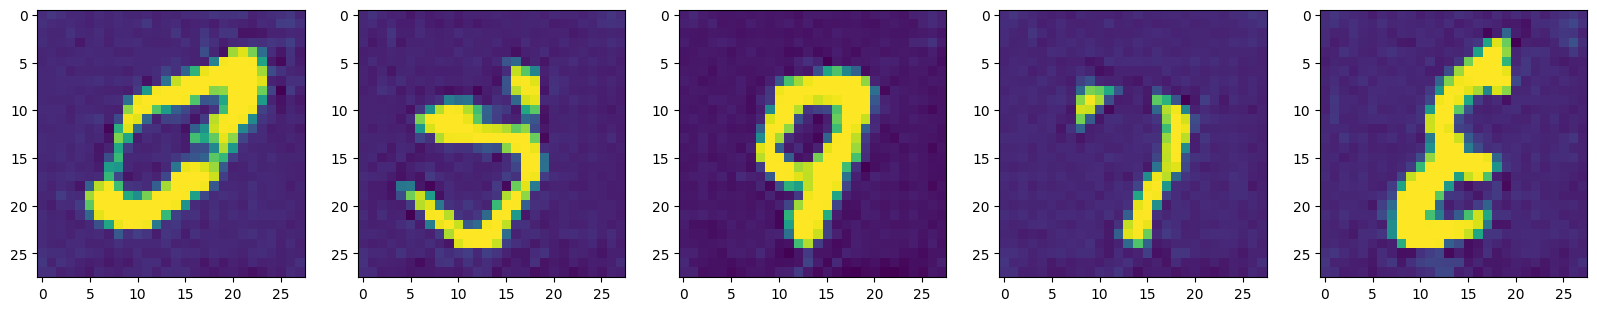

generator_loss=-0.6611576080322266,mean_critic_loss=-7.523612976074219:  55%|█████▌    | 11/20 [06:43<05:27, 36.42s/it]

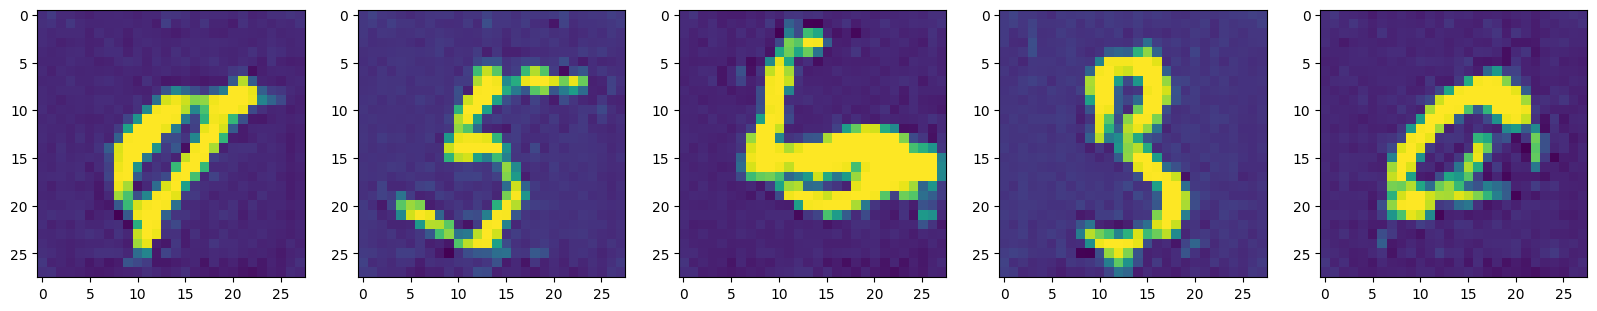

generator_loss=0.5403836965560913,mean_critic_loss=-8.513566970825195:  60%|██████    | 12/20 [07:19<04:51, 36.39s/it]

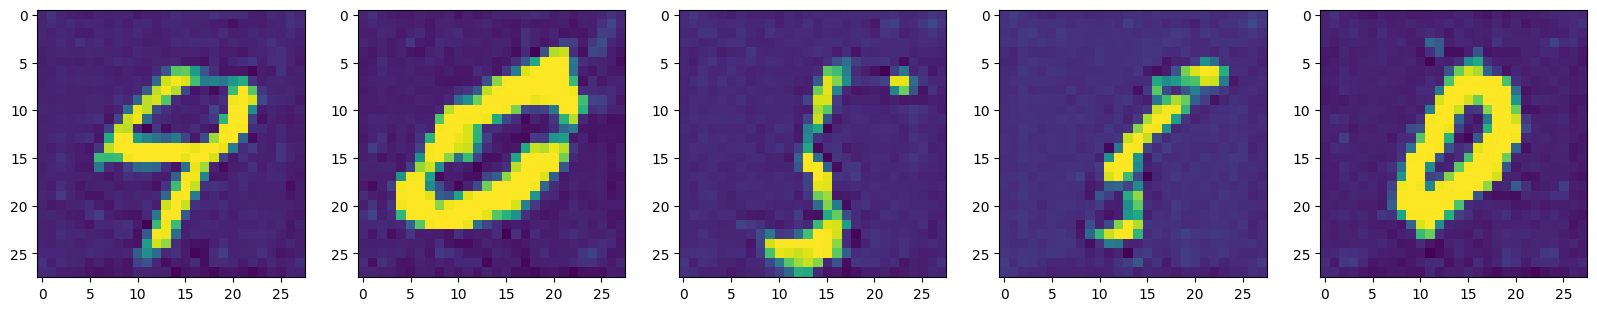

generator_loss=5.295832633972168,mean_critic_loss=-3.046994209289551:  65%|██████▌   | 13/20 [07:55<04:14, 36.29s/it]

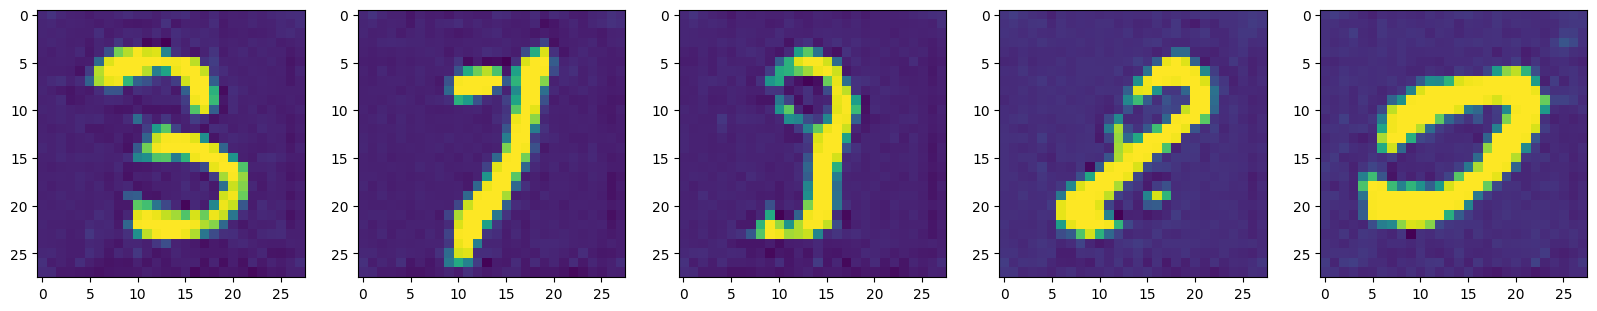

generator_loss=-4.552632808685303,mean_critic_loss=-6.522843837738037:  70%|███████   | 14/20 [08:32<03:37, 36.31s/it]

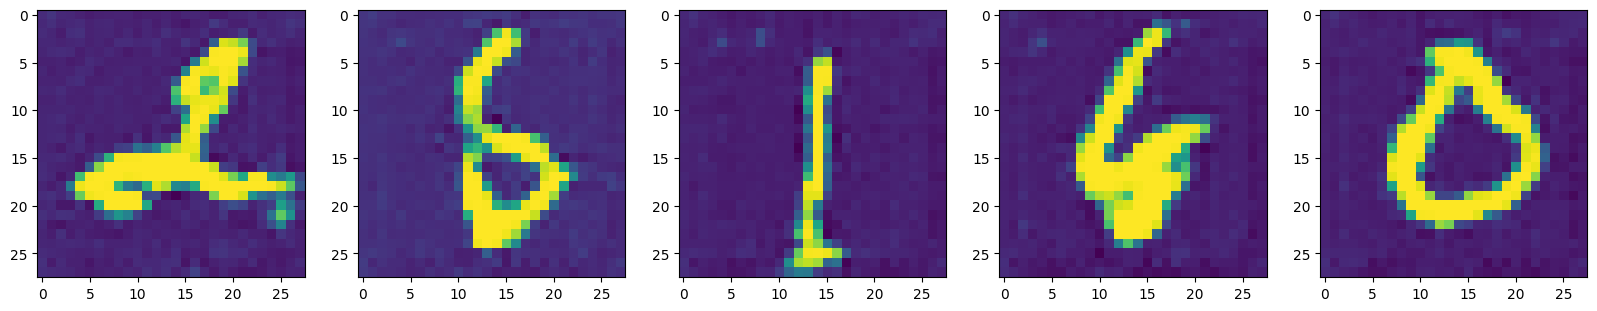

generator_loss=-2.6099867820739746,mean_critic_loss=1.0624747276306152:  75%|███████▌  | 15/20 [09:08<03:01, 36.26s/it]

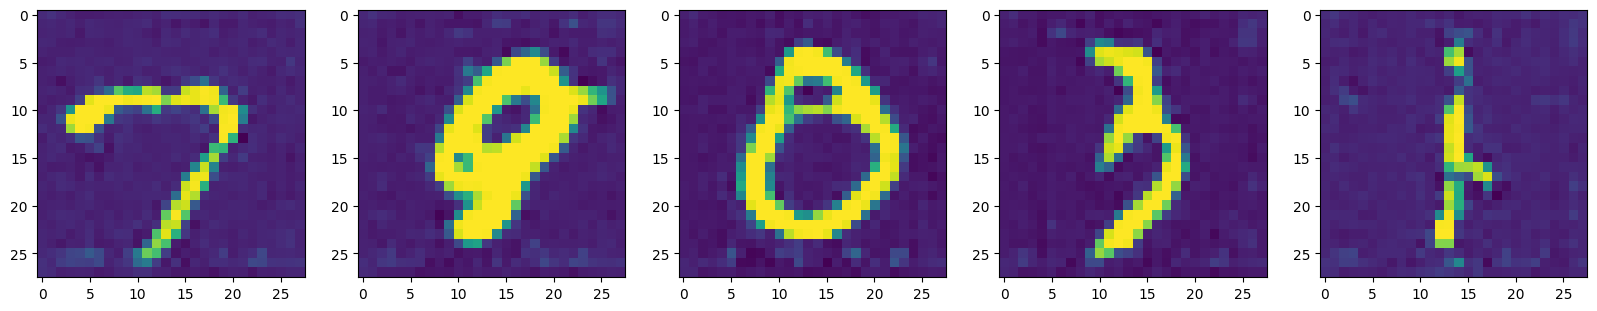

generator_loss=-0.7625641822814941,mean_critic_loss=1.134376049041748:  80%|████████  | 16/20 [09:44<02:25, 36.26s/it]

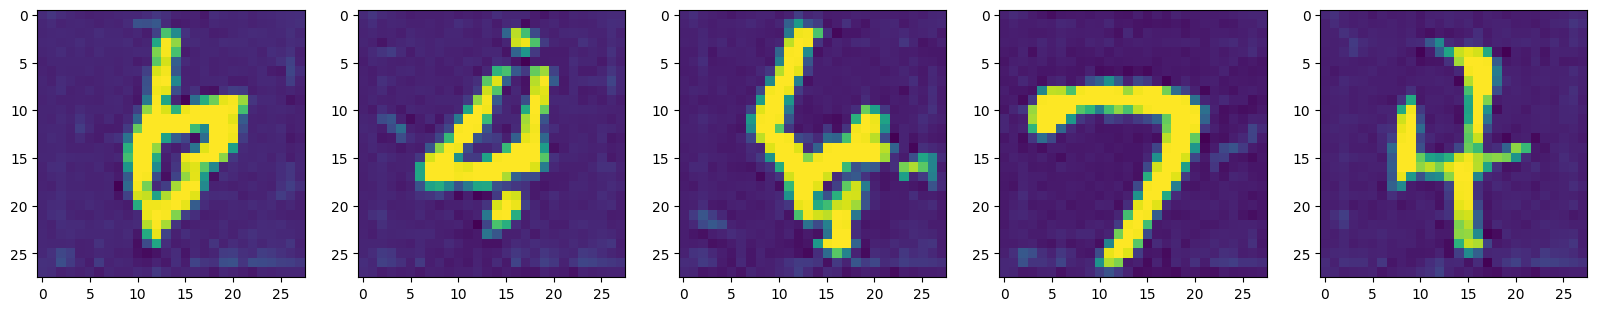

generator_loss=-2.326237678527832,mean_critic_loss=1.562854290008545:  85%|████████▌ | 17/20 [10:20<01:48, 36.21s/it]

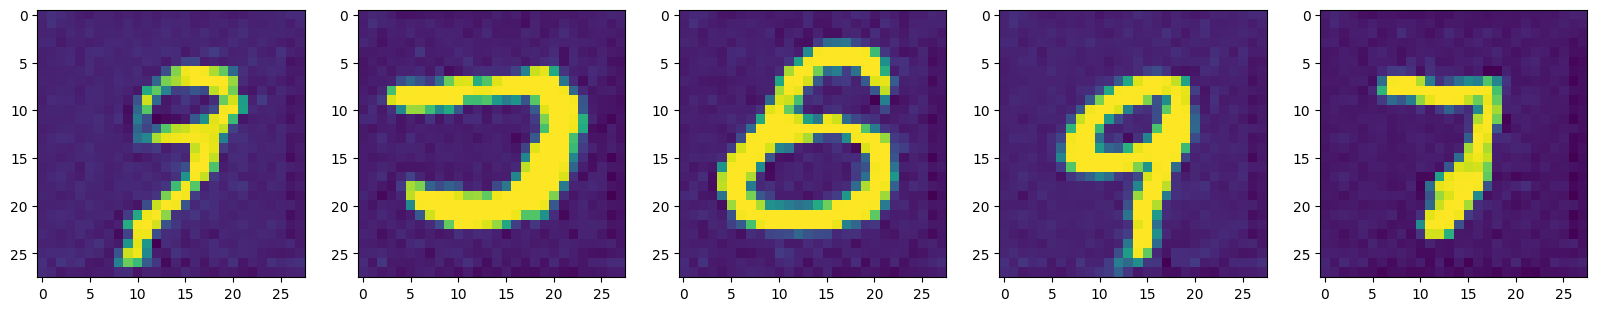

generator_loss=-1.5462791919708252,mean_critic_loss=-2.0302834510803223:  90%|█████████ | 18/20 [10:57<01:12, 36.21s/it]

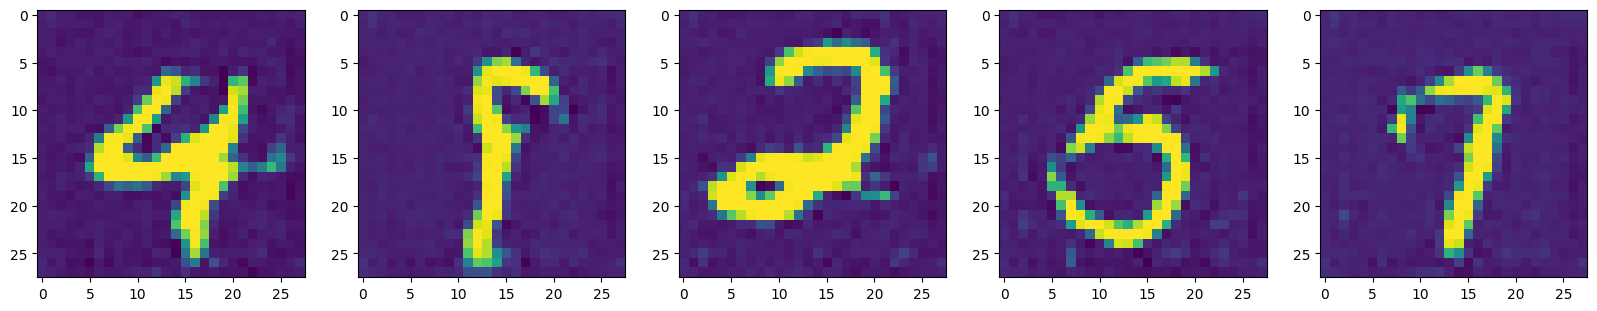

generator_loss=3.633634567260742,mean_critic_loss=-2.58278751373291:  95%|█████████▌| 19/20 [11:33<00:36, 36.34s/it]

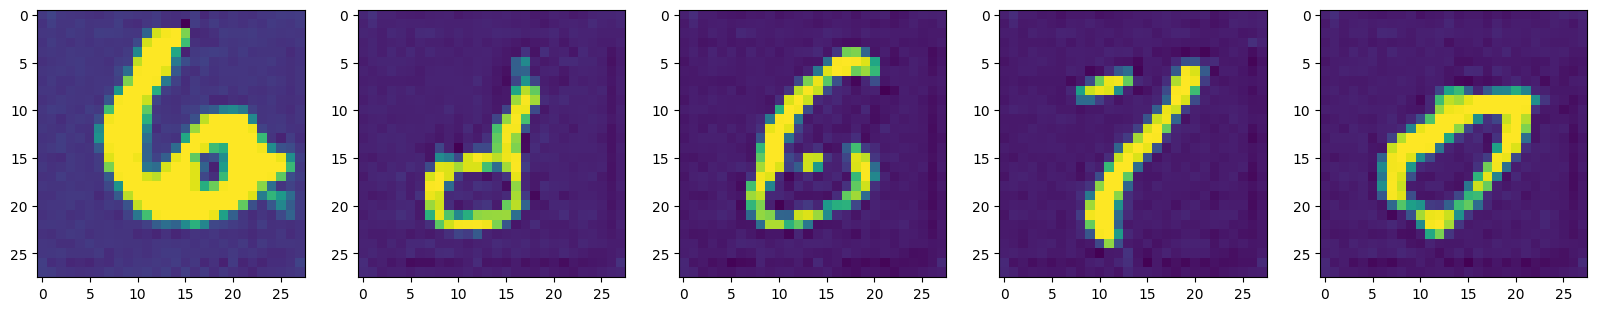

generator_loss=0.1215851902961731,mean_critic_loss=-6.190342903137207: 100%|██████████| 20/20 [12:10<00:00, 36.52s/it]


In [ ]:


opt_gen = optim.Adam(params=gen.parameters(), lr=LR, betas=(0.5, 0.999))
opt_crit = optim.Adam(params=crit.parameters(), lr=LR,betas=(0.5, 0.999))


critic_loss_hist, gen_loss_hist = [], []


for _ in (pbar := tqdm(range(N_EPOCHS))):
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)

        for _ in range(CRITIC_STEPS):
            mean_critic_loss = 0
            batch_size = len(data)
            opt_crit.zero_grad()
            fake_samples = gen(torch.randn(batch_size, LATENT_DIM, device=device))
            crit_fake_preds = crit(fake_samples)
            crit_real_preds = crit(data)

            # Grad to mixed images
            # Could just clip grad here
            epsilon = torch.rand(batch_size, 1, 1, 1, requires_grad=True, device=device)
            mixed_images = data * epsilon + fake_samples * (1 - epsilon)
            mixed_scores = crit(mixed_images)
            grads = torch.autograd.grad(
                inputs=mixed_images,
                outputs=mixed_scores,
                grad_outputs=torch.ones_like(mixed_scores),
                create_graph=True,
                retain_graph=True
            )[0]
            grad_norm = grads.flatten(1).norm(2, dim=1)
            grad_penanlty = torch.mean((grad_norm - 1) ** 2)
            critic_loss = crit_fake_preds.mean() - crit_real_preds.mean() + GRAD_WEIGHT * grad_penanlty
            critic_loss.backward()
            opt_crit.step()
            mean_critic_loss += critic_loss.detach().cpu().item()
        critic_loss_hist.append(mean_critic_loss)

        opt_gen.zero_grad()
        fake_samples = gen(torch.randn(batch_size, LATENT_DIM, device=device))
        crit_fake_preds = crit(fake_samples)
        generator_loss = - crit_fake_preds.mean()
        generator_loss.backward()
        generator_loss = generator_loss.detach().cpu().item()
        gen_loss_hist.append(generator_loss)
        opt_gen.step()

    n_samples = 5
    with torch.no_grad():
        fake_samples = gen(torch.randn(n_samples, LATENT_DIM, device=device))
    fig, axs = plt.subplots(1, 5, figsize=(20, 6))
    for i in range(n_samples):
        axs[i].imshow(fake_samples[i].squeeze().cpu().numpy())
    plt.show()
    pbar.set_description(f'{generator_loss=},{mean_critic_loss=}')


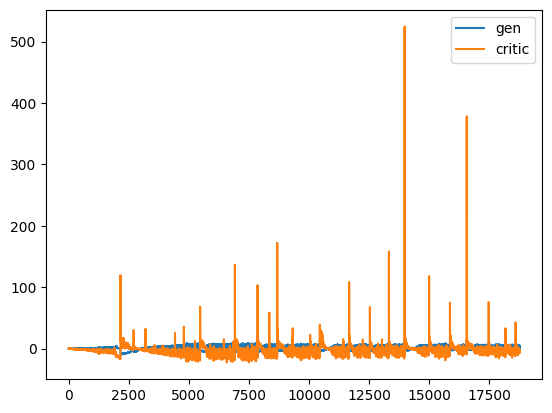

In [ ]:
plt.plot(gen_loss_hist, label='gen')
plt.plot(critic_loss_hist, label='critic')
plt.legend();


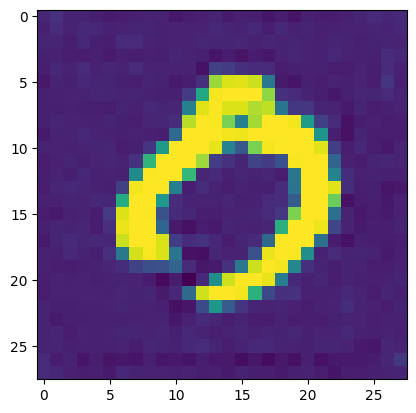

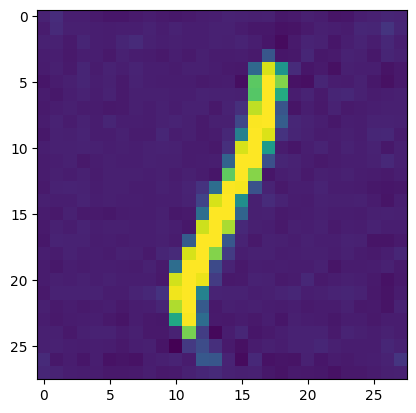

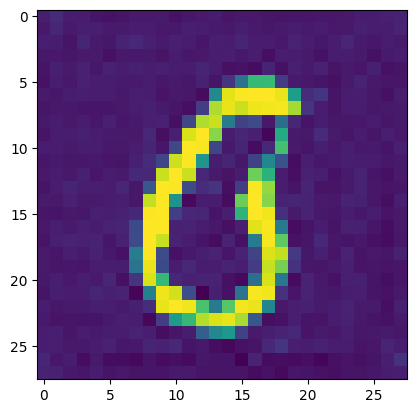

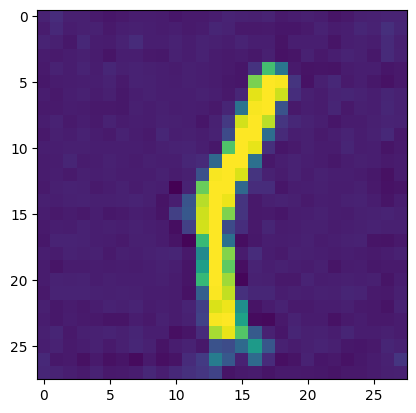

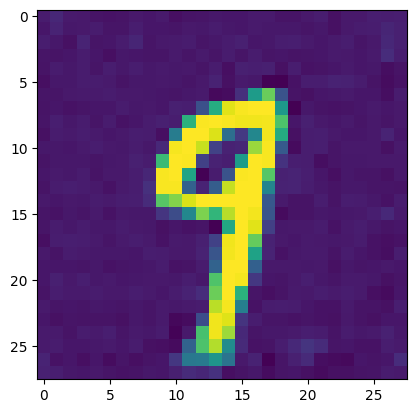

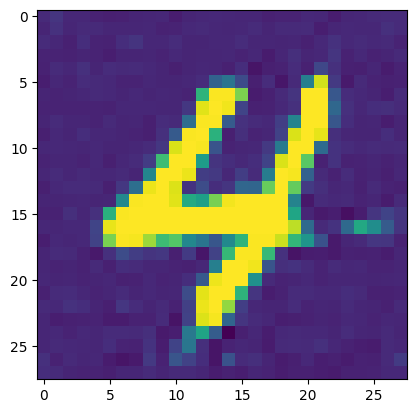

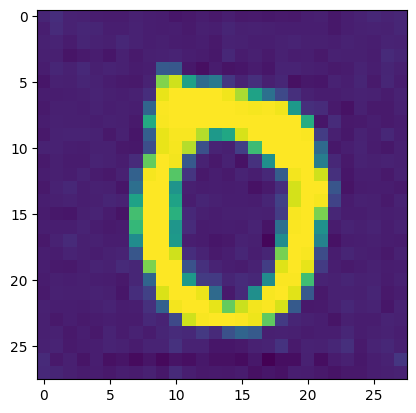

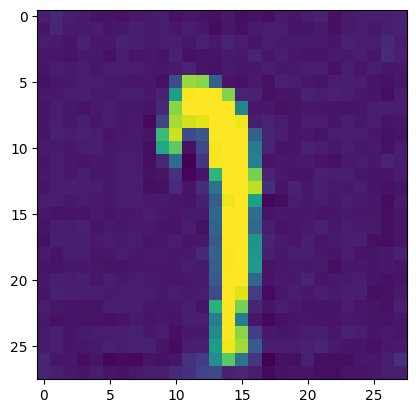

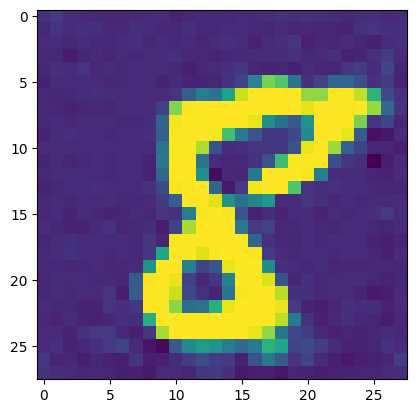

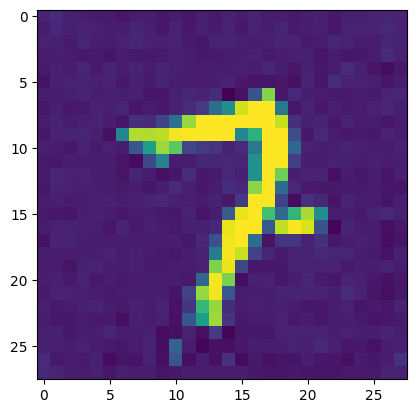

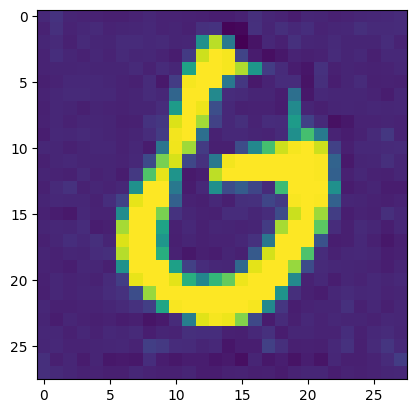

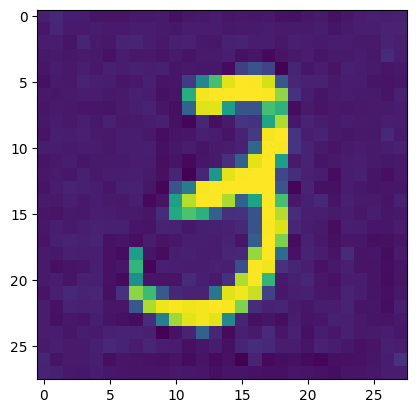

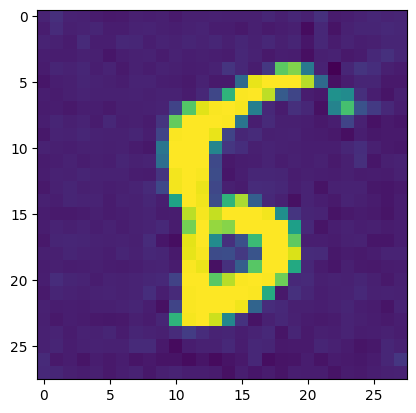

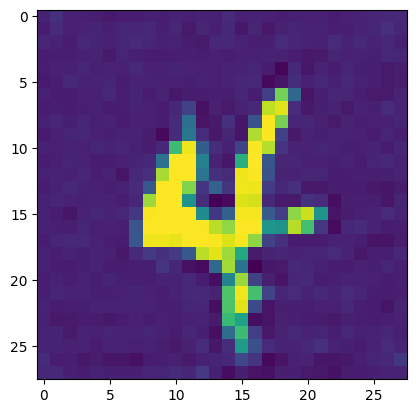

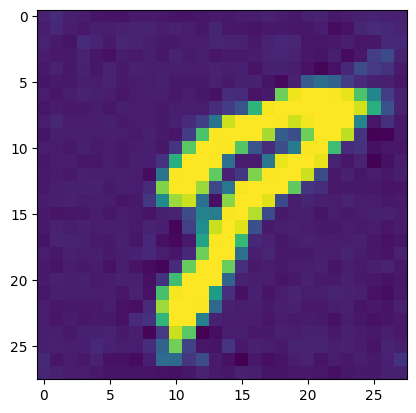

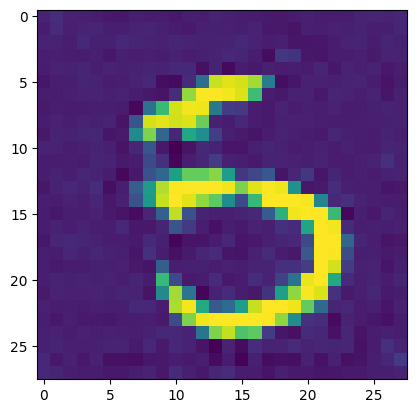

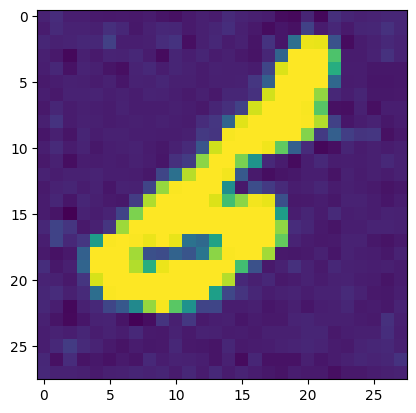

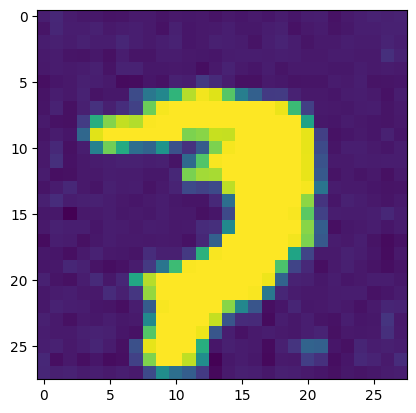

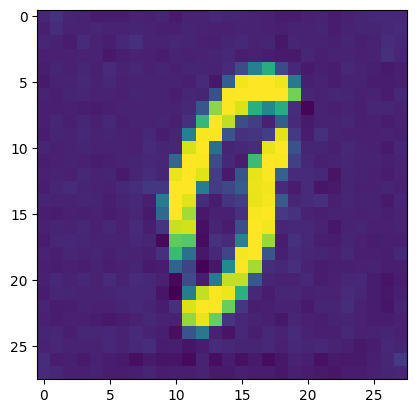

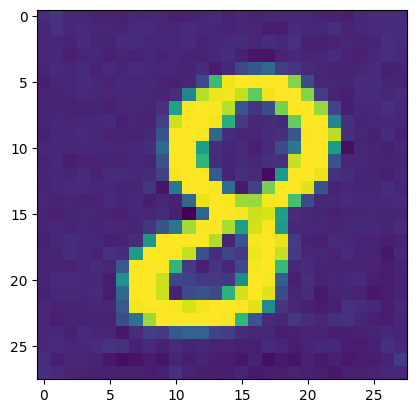

In [ ]:
n_samples = 20
with torch.no_grad():
    fake_samples = gen(torch.randn(n_samples, LATENT_DIM, device=device))
for i in range(n_samples):
    plt.imshow(fake_samples[i].squeeze().cpu().numpy())
    plt.show()